In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 8s 1us/step


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [5]:
predictions = model(x_train[:1]).numpy()
print(predictions)

[[ 0.04373834  0.37926614  0.30270338  0.11269835 -0.34447727 -0.11309253
   0.31491795 -0.3822552   0.2511217   0.35144603]]


In [6]:
tf.nn.softmax(predictions).numpy()

array([[0.09213055, 0.12886101, 0.11936329, 0.09870806, 0.06248903,
        0.07875767, 0.12083019, 0.06017236, 0.11336242, 0.12532549]],
      dtype=float32)

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [8]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2959 - accuracy: 0.9137
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1410 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1066 - accuracy: 0.9682
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0886 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0740 - accuracy: 0.9771


In [10]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0759 - accuracy: 0.9776 - 365ms/epoch - 1ms/step


[0.07591027021408081, 0.9775999784469604]

In [16]:
model.save('model.h5')

C:\Users\chenjw\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
model = tf.keras.models.load_model('model.h5')

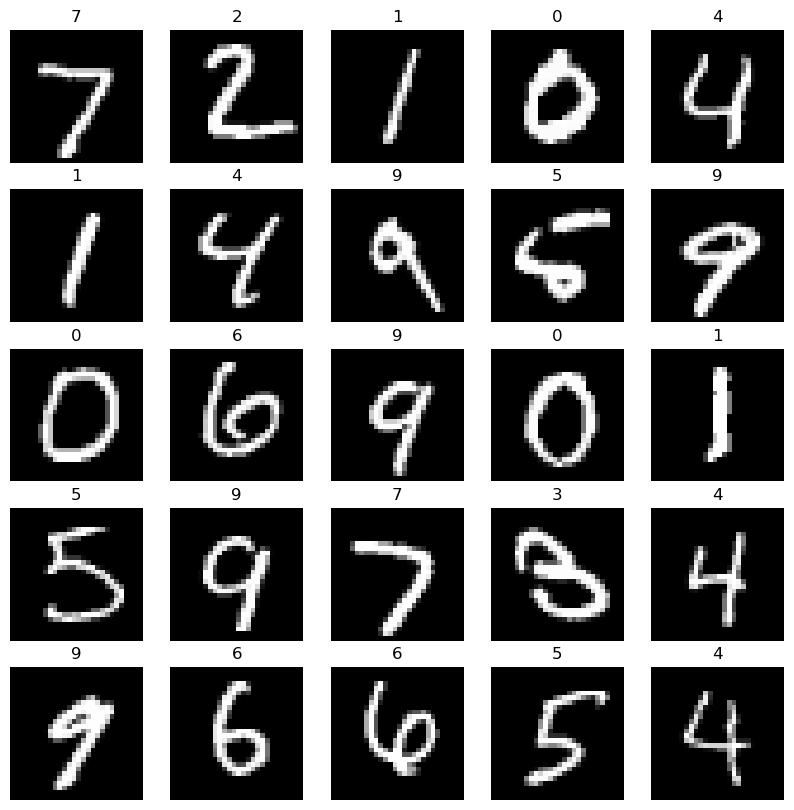

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(y_test[i])
    plt.axis("off")
plt.show()

In [11]:
probability_model = tf.keras.Sequential([
      model,
      tf.keras.layers.Softmax()
])
print(probability_model(x_test[:5]))

tf.Tensor(
[[2.60608757e-09 1.10560783e-10 4.04194452e-06 1.25599894e-04
  1.03618615e-11 3.21998272e-07 9.64725465e-15 9.99865890e-01
  5.17334286e-07 3.47747869e-06]
 [2.47054222e-09 1.00981182e-04 9.99895453e-01 3.33500020e-06
  2.21724935e-14 2.68529643e-08 4.06029166e-08 8.93652556e-13
  2.90546041e-07 2.43077780e-10]
 [3.34148211e-07 9.99552786e-01 6.47981360e-05 5.36777270e-06
  8.62585875e-05 1.48603267e-05 9.41608141e-06 1.64957819e-04
  9.79890538e-05 3.11912345e-06]
 [9.99526381e-01 3.76752324e-10 2.40964990e-04 7.98212909e-07
  1.47110612e-07 1.10690860e-06 1.40033499e-05 1.39550571e-06
  1.27516543e-07 2.15116277e-04]
 [3.18716457e-06 1.49041213e-09 6.53662573e-06 1.33236862e-08
  9.97471988e-01 6.22493701e-08 8.09099504e-07 3.61165148e-04
  6.84817223e-07 2.15547951e-03]], shape=(5, 10), dtype=float32)
